## Part 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [6]:
path = r'C:\Users\aaron\Downloads\archive'

In [8]:
df = pd.read_csv(os.path.join(path, 'A6_Data.csv'), index_col = False)

In [10]:
df = df.drop(columns = ['Unnamed: 0'])

## Part 3

In [14]:
# checking for missing values
df.isnull().sum()

world_rank                     0
institution                    0
country                        0
national_rank                  0
rank_for_education             0
rank_for_alumni_employment     0
rank_for_faculty               0
rank_for_publications          0
rank_for_influence             0
rank_for_number_of_students    0
rank_for_patents               0
average_rank                   0
score                          0
year                           0
dtype: int64

There are no missing values

In [17]:
# checking for duplicates
df_dups = df[df.duplicated()]

In [19]:
df_dups

,world_rank,institution,country,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year


There are no duplicated rows

## Part 4

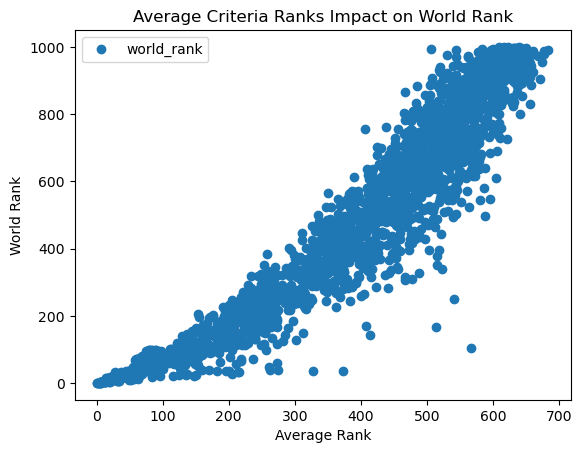

In [24]:
# Making a scatterplot
scatter = df.plot(x = 'average_rank', y='world_rank',style='o')
plt.title('Average Criteria Ranks Impact on World Rank')  
plt.xlabel('Average Rank')  
plt.ylabel('World Rank')  
plt.show()

In [26]:
scatter.figure.savefig(os.path.join(path, 'Scatterplot.png'))

## Part 5

Hypothesis: The higher the average criteria rank is, the higher the world rank will be.

## Part 6

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['average_rank'].values.reshape(-1,1)
y = df['world_rank'].values.reshape(-1,1)

In [35]:
X

array([[  3.57],
       [  7.14],
       [  8.  ],
       ...,
       [631.86],
       [639.29],
       [623.29]])

In [37]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

## Part 7

In [41]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Part 8

In [45]:
# Regression object for training set
regression = LinearRegression()

In [47]:
# Fiting model to training set
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predicting y value with X
y_predicted = regression.predict(X_test)

## Part 9

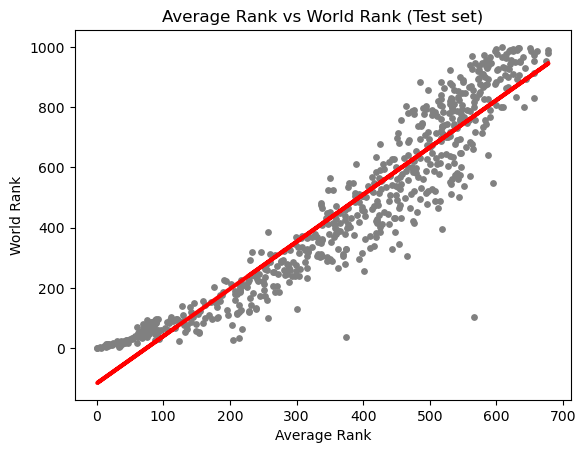

In [59]:
# Making a plot that shows the regression model test
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Rank vs World Rank (Test set)')
plot_test.xlabel('Average Rank')
plot_test.ylabel('World Rank')
plot_test.show()

## Part 10

This test set looks pretty good. A lot of the data points are close to the line of best fit. Though the graph looks like it has exponential growth insted of linear growth.

## Part 11

In [58]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.56652074]]
Mean squared error:  9742.20907612351
R2 score:  0.894524328845222


## Part 12

In [65]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,121,242.917044
1,168,244.483565
2,92,85.591366
3,65,225.685316
4,529,597.389356
5,71,-22.279252
6,366,364.432057
7,200,220.766441
8,247,331.315809
9,864,846.920444


## Part 13

While the R2 score shows that the prediction has a very strong connection to the actual values, the MSE, and the direct comparicons are way too large to call this a good model

In regards to data bias, I'm not sure. Given how subjective this data set is there definitely can be bias within the data, but from what I have I can't pin point what that bias is if it exists.